In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

In [11]:
def Bt(N, T, K,ty=False):
    step = T/K
    t = list(map(lambda r: r*step,range(0, K+1)))
    B = np.zeros((N, K+1))
    normals = normal(size=(N, K+1))
    for i in range(1, K+1):
        B[:, i] = B[:, i-1] + np.sqrt(step) * normals[:, i]
    if ty:
        return B
    return B[:,-1]

def heat1d(f,x,Bt):
    return np.mean(f(Bt+x))

def heat2d(f,x,y,Bt1,Bt2):
    ef=[]
    for i in range(len(Bt1)):
        ef.append(f(Bt1[i]+x,Bt2[i]+y)) 
    return np.mean(ef)

def plotheat1d(f,X,T,N,h):
    for t in T:
        K=np.int32(np.ceil(t/h))
        B=Bt(N,t,K)
        ftx=[]
        for x in X:
            ftx.append(heat1d(f,x,B))
        plt.suptitle('Simulación estática')
        plt.xlabel("Posición")
        plt.ylabel("Temperatura")
        plt.plot(X,ftx)
        
def plotheat2d(f,X,Y,T,N,h):
    for t in T:
        K=np.int32(np.ceil(t/h))
        B1=Bt(N,t,K)
        B2=Bt(N,t,K)
        ftx=np.zeros([len(X),len(Y)])
        hx=0
        hy=0
        for x in X:
            for y in Y:
                ftx[hx][hy]=heat2d(f,x,y,B1,B2)
                hy+=1
            hy=0
            hx+=1
        plt.suptitle('Evolución mapa de calor')
        plt.xlabel("Posición en eje x")
        plt.ylabel("Posición en eje y")    
        plt.imshow(ftx)
        plt.show()
        
def gaussiana1d(x):
    return np.exp(-x**2)

def gaussiana2d(x,y):
    return np.exp(-x**2-y**2)

def wave(x,y):
    return np.sin(x)*np.sin(y)*np.exp(-x**2-y**2)

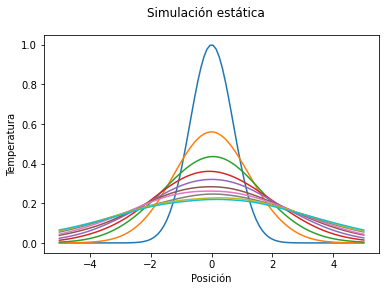

In [7]:
plotheat1d(gaussiana1d,np.linspace(-5,5,100),np.linspace(0.001,10,10),10000,0.1)

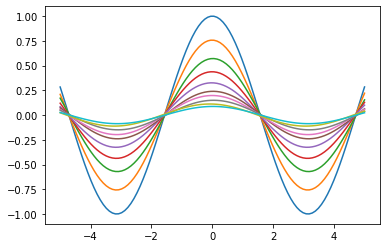

In [4]:
plotheat1d(np.cos,np.linspace(-5,5,100),np.linspace(0.001,5,10),10000,0.1)

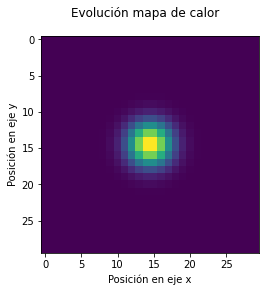

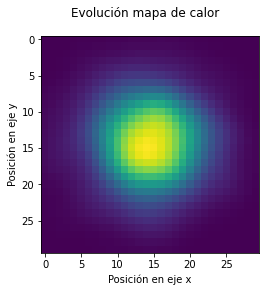

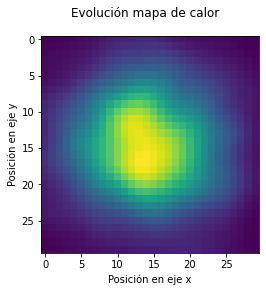

In [12]:
plotheat2d(gaussiana2d,np.linspace(-5,5,30),np.linspace(-5,5,30),np.linspace(0.001,5,3),1000,0.1)

In [13]:
plotheat2d(wave,np.linspace(-5,5,30),np.linspace(-5,5,30),np.linspace(0.001,10,10),1000,0.1)

KeyboardInterrupt: 